In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [53]:
#Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [54]:
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [56]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanup_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ID)==False]
cleanup_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Checking the number of mice in the clean DataFrame.

cleanup_mice = cleanup_df["Mouse ID"].nunique()

cleanup_mice

248

In [66]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).mean()
median = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).median()
var = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).var()
std = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).std()
sem = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
#stat = ['mean', 'median', 'var', 'std', 'sem']
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleanup_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [68]:
mice_count = cleanup_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, '# of Mice per Treatment')

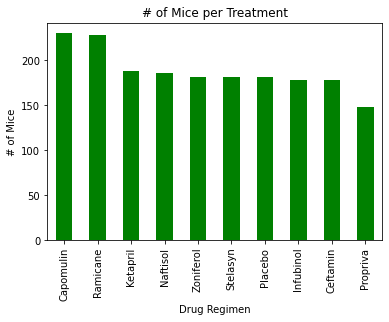

In [69]:
# Create a Pandas bar plot based off of the group series from before and label the title

plot_pandas = mice_count.plot.bar(color='g')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("# of Mice per Treatment")

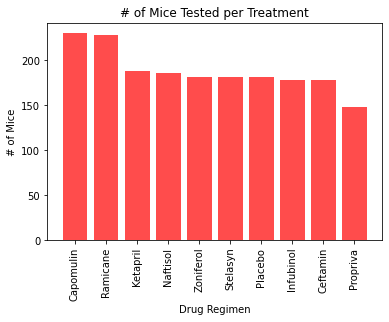

In [70]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='r', alpha=0.7, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("# of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.xticks(rotation="vertical")

plt.show()

In [71]:
# First create a dataframe grouping by the 'Sex' column
gender_group = combined_data.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()

,Sex
Sex,
Female,935
Male,958


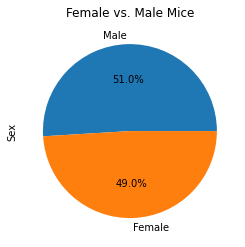

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = cleanup_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

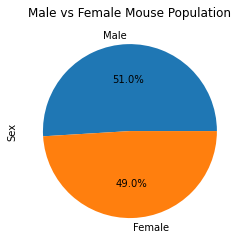

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()